<a href="https://colab.research.google.com/github/difurka/mlbookcamp_learning/blob/main/mlzoomcamp_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd
import numpy as np

In [204]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-24 12:49:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.4’

housing.csv.4       100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-09-24 12:49:21 (138 MB/s) - ‘housing.csv.4’ saved [1423529/1423529]



In [205]:
df = pd.read_csv('/content/housing.csv')

In [206]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [207]:
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ', '_')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

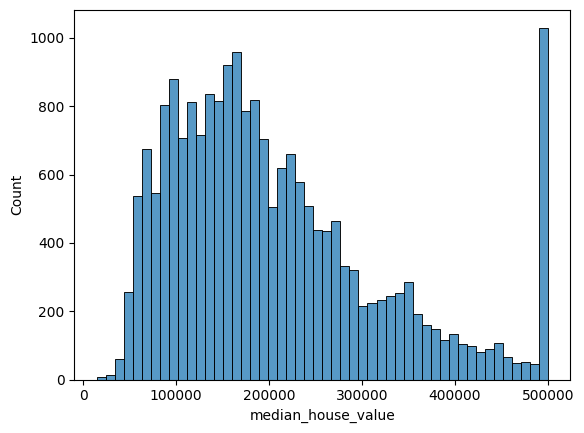

In [209]:
sns.histplot(df.median_house_value, bins=50)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [211]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [212]:
df = df[(df['ocean_proximity'] == '<1h_ocean') | (df['ocean_proximity'] == 'inland')]

In [213]:
df.nunique()

longitude               818
latitude                834
housing_median_age       52
total_rooms            5428
total_bedrooms         1822
population             3683
households             1707
median_income         10434
median_house_value     3493
ocean_proximity           2
dtype: int64

In [214]:
df = df.drop(['ocean_proximity'], axis=1)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [216]:
df['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [217]:
df['population'].median()

1195.0

# test, val, train

In [218]:
n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [219]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [220]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


In [221]:
len(y_train), len(y_val), len(y_test)

(9413, 3137, 3137)

In [222]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def prepare_X_by_0(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_by_mean(df):
    df_num = df
    tot_bedrooms_mean = df_train['total_bedrooms'].median()
    df_num = df_num.fillna(tot_bedrooms_mean)
    X = df_num.values
    return X

In [223]:
X_train = prepare_X_by_0(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_by_0(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.34

In [224]:
X_train = prepare_X_by_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_by_mean(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.34

In [225]:
X_train = prepare_X_by_0(df_train)

In [226]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [227]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_by_0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_by_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)

    print(r, w0, score)

0 -9.76324947708778 0.34
1e-06 -9.763228830944234 0.34
0.0001 -9.7611852355206 0.34
0.001 -9.742646249322865 0.34
0.01 -9.56105619296396 0.34
0.1 -8.058889769044278 0.34
1 -3.133154278380411 0.34
5 -0.8410867973986649 0.35
10 -0.4381172315580547 0.35


In [228]:
rm = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  np.random.seed(s)
  np.random.shuffle(idx)
  n_val = int(n * 0.2)
  n_test = int(n * 0.2)
  n_train = n - n_val - n_test
  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]
  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)
  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)
  X_train = prepare_X_by_0(df_train)
  w0, w = train_linear_regression(X_train, y_train)

  X_val = prepare_X_by_0(df_val)
  y_pred = w0 + X_val.dot(w)
  rm.append(rmse(y_val, y_pred))
round(np.std(rm), 3)

0.003

In [229]:
np.random.seed(9)
np.random.shuffle(idx)
# n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_test


df_tr = df.iloc[idx[:n_train]]
# df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train:]]
df_tr = df_tr.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_tr = np.log1p(df_tr.median_house_value.values)
# y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# df_tr =np.concatenate(( df_train, df_val))
# y_tr = np.concatenate((y_train, y_val))

X_tr = prepare_X_by_0(df_tr)
w0, w = train_linear_regression_reg(X_tr, y_tr, r=0.001)

X_test = prepare_X_by_0(df_test)
y_pred = w0 + X_test.dot(w)
round(rmse(y_test, y_pred), 2)

0.17